## Phase - 3: Predicting Anomalies in Network Traffic (A Binary Classification problem)

**NOTE: Jump to the cell "Phase-3 Baseline Model to Best Model" to get to the steps performed in Phase-3.**

### Problem Statement

Before working on this phase, please practice "Activities 6, 7, 8 and 9" in the 'Neural networks using Tensorflow' crash course (see nn-tf tab). 

The main goal in this phase is to obtain highest possible accuracy on the validation set after splitting your data into training set and validation set. Please shuffle your rows before splitting. 

As your baseline model, i.e., the model with minimum accuracy, you can test the accuracy on the validation set using a 'logistic regression' model. 

Then you can gradually grow your model into a multi-layered model and investigate if larger models deliver higher accuracy on the validation set. Please note that your model should be smaller than the model in the previous phase. 

As you explore various network architectures, please note the accuracies of these models to include in your report. You can summarize your findings in the form of a table and the table should contain the accuracy and loss on the training set and the validation set. You can also include other parameters such as number of epochs, number of neurons, total number of parameters, etc. 

Also remember to select one model as your best performing model, i.e., the model that delivers highest accuracy on the validation set. 

Your report should also include learning curves of your experiments. Additionally, you should also evaluate your models using other metrics besides precision; for example recall, precision, and F1 score.

Here is an example report. Please note that your submission for this phase is ineligible for points if you do not use Early Stopping in your code.

Clarification (09/19/2021): You are discouraged to use external library methods such as "from sklearn.model_selection import train_test_split".

[FOR GRADUATE STUDENTS ONLY] In addition to the requirements above, graduate students are required to do the following two tasks to receive full points: 

1) discuss what architecture (how big) you do need to overfit when you have output as additional input feature,

2) code a function that represents your model. Once you have finished coding your model, please build your own function/method that serves as a prediction model. Afterwards, please verify that predictions you obtain are same as the one you obtained using your trained model. The lecture on Linear regression with two input variables will be helpful to complete this task.

### Approach

- This phase-3 of the "Predicting Anamolies in Network Traffic" is a continuation to the phase-2 of the project which can be found here - https://github.com/reshma2303/AI5300/tree/main/phase-2
- In this phase - 3, below things will be accomplished as requested in the above problem statement:
    - Step-1: Build a baseline model
    - Step-2: Obtain the best model that obtains highest possible accuracy on the validation dataset.
    - Step-3: A tabular representation of model configurations (epochs, activation functions) along with metrics (precision, recall, F1 score and confusion matrix) and learning curves are obtained.
    - Step-4: Highlight the importance of EarlyStopping in machine learning model development process.
    - Step-5: How big an architecture is required to overfit if the output is used as additional input feature.
    - Step-7: Code a function that represents the model. Build custom function for serving as prediction. Compare the predictions obtained from custom function is same as model predictions.
        
**NOTE** 
  
- The detailed analysis of the dataset is covered in the phase-1 of the project - https://github.com/reshma2303/AI5300/tree/main/phase-1-data-analysis
 

### 1. Data Load and Pre-Processing required for modeling

#### Categorical Columns

'protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login'

In [1]:
catg_cols = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login']

#### Continuous Columns

In [2]:
cont_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

#### Target Variable

The target variable "label" contains all different types of malware attacks and also the value "normal" (i.e., not an attack) as shown below.

'normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune', 'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep', 'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap', 'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'

All malware attacks are grouped (transformed) to the value "abnormal" to make this problem a binary classification problem instead of a multi-class classification.


In [3]:
target_variable = 'label'

#### Data Load

In [5]:
import pandas as pd
df = pd.read_csv("../datasets/kddcup99_csv.csv")

#### Dataset size

In [6]:
df.shape

(494020, 42)

494020 records with 41 features and 1 target variable ("label") for prediction

In [7]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


As seen above, there are various type of malware attacks which can be grouped as "abnormal" to make this problem as binary classification problem

##### Group all malware attacks as "abnormal"

In [8]:
attack_types = list(df['label'].unique())
attack_types.remove('normal') # remove normal from attack types as we only want malware attacks to convert as abnormal

In [9]:
df['label'] = df['label'].replace(attack_types, 'abnormal')
df.shape

(494020, 42)

In [10]:
df['label'].value_counts()

abnormal    396743
normal       97277
Name: label, dtype: int64

In [11]:
df[catg_cols].dtypes

protocol_type     object
service           object
flag              object
land               int64
logged_in          int64
is_host_login      int64
is_guest_login     int64
dtype: object

As seen from the above datatypes of the categorical columns,the column values are not strings. We need to convert them to string before performing any analysis

##### Fixing the data types of categorical columns

In [12]:
df['protocol_type'] = df['protocol_type'].astype(str)
df['service'] = df['service'].astype(str)
df['flag'] = df['flag'].astype(str)
df['land'] = df['land'].astype(str)
df['logged_in'] = df['logged_in'].astype(str)
df['is_host_login'] = df['is_host_login'].astype(str)
df['is_guest_login'] = df['is_guest_login'].astype(str)
df[catg_cols].dtypes

protocol_type     object
service           object
flag              object
land              object
logged_in         object
is_host_login     object
is_guest_login    object
dtype: object

In [13]:
df.drop(columns=['is_host_login'], inplace=True)
df.drop(columns=['num_outbound_cmds'], inplace=True)

### Transform Target Binary label to 0 and 1

In [14]:
df['label'] = df['label'].map({'normal': 1, 'abnormal': 0})
df['label'].value_counts()

0    396743
1     97277
Name: label, dtype: int64

### One hot encode categorical columns

In [15]:
def convert_categorical_to_one_hot_encoding(dataset, column_name):
    dummy_values = pd.get_dummies(dataset[column_name])
    
    for category in dummy_values.columns:
        dummy_value_name = f"{column_name}-{category}"
        dataset[dummy_value_name] = dummy_values[category]
    dataset.drop(column_name, axis=1, inplace=True)



In [16]:
for cat_col in catg_cols:
    if cat_col != "is_host_login":
        convert_categorical_to_one_hot_encoding(df, cat_col)
df.shape

(494020, 120)

In [17]:
df.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag-S2,flag-S3,flag-SF,flag-SH,land-0,land-1,logged_in-0,logged_in-1,is_guest_login-0,is_guest_login-1
0,0,181,5450,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
1,0,239,486,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
2,0,235,1337,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
3,0,219,1337,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
4,0,217,2032,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0


### Data Normalization (scaling numerical features to unit norm)

As seen from the above continous variables distribution in the section 2.6 the scale of some of the features (columns) values are not in same range as others.
Hence the features need to be normalized so that the optimization during model training will happen in a better way and the model will not be sensitive to the features.

In [18]:
cont_cols_new = [each for each in cont_cols if each!='num_outbound_cmds']

In [19]:
df_CONTCOLS_MIN = df[cont_cols_new].min(axis=0)
df_CONTCOLS_MAX = df[cont_cols_new].max(axis=0)

In [20]:
df[cont_cols_new] = (df[cont_cols_new] - df_CONTCOLS_MIN) / (df_CONTCOLS_MAX - df_CONTCOLS_MIN)

In [21]:
df[cont_cols_new].head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.035294,0.035294,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0.0,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.074510,0.074510,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0.0,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113725,0.113725,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0.0,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.152941,0.152941,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0.0,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192157,0.192157,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [22]:
df.isna().values.any() # making sure there are no NaN values in the dataset

False

### Phase - 3: Baseline Model to BestModel

#### 1. Shuffle DataFrame

In [23]:
df = df.sample(frac=1).reset_index(drop=True)

In [24]:
X_numpy = df.drop(columns=['label']).to_numpy()
Y_numpy = df['label'].to_numpy()

In [25]:
X_numpy.shape

(494020, 119)

In [26]:
Y_numpy.shape

(494020,)

In [27]:
# Split into training and validation, 20% validation set and 80% training 
index_20percent = int(0.2 * len(df.to_numpy()[:, 0]))
print(index_20percent)
XVALID = X_numpy[:index_20percent]
YVALID = Y_numpy[:index_20percent]
XTRAIN = X_numpy[index_20percent:]
YTRAIN = Y_numpy[index_20percent:]

98804


### Phase-3: Baseline to Best on Validation Set

In next steps, the notebook will be starting with a baseline model configuration and will be changing the other hyperparameters (number of neurons, layers, activation functions, losses, optimizers, epochs and batch sizes).
For every model, we will be plotting corresponding learning curves and metrics.

Emphasis on Early Stopping is also performed

In [28]:
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
all_models = {}

In [31]:
import tensorflow as tf
metrics_to_obtain = ['accuracy', tf.keras.metrics.Precision(),
                    tf.keras.metrics.Recall(),
                    tf.keras.metrics.AUC()]

#### Step-1: Finiding the best number of hidden layers (Baseline Performance)

In [32]:
no_hidden_layers_model = Sequential()
no_hidden_layers_model.add(Dense(1, input_dim = len(XTRAIN[0, :])))
no_hidden_layers_model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

single_hidden_layer_model = Sequential()
single_hidden_layer_model.add(Dense(4, input_dim = len(XTRAIN[0, :])))
single_hidden_layer_model.add(Dense(1, activation='sigmoid'))
single_hidden_layer_model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

two_hidden_layers_model = Sequential()
two_hidden_layers_model.add(Dense(4, input_dim = len(XTRAIN[0, :])))
two_hidden_layers_model.add(Dense(2, activation='sigmoid'))
two_hidden_layers_model.add(Dense(1, activation='sigmoid'))
two_hidden_layers_model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

In [33]:
all_models['No Hidden Layers'] = no_hidden_layers_model
all_models['Single Hidden Layer'] = single_hidden_layer_model
all_models['Two Hidden Layers'] = two_hidden_layers_model
all_models

{'No Hidden Layers': <keras.engine.sequential.Sequential at 0x2af0b4e0c40>,
 'Single Hidden Layer': <keras.engine.sequential.Sequential at 0x2af0b4df8e0>,
 'Two Hidden Layers': <keras.engine.sequential.Sequential at 0x2af0b49aa00>}

In [34]:
no_hidden_layers_model_history = no_hidden_layers_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs = 8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 1s 645us/step - loss: 0.3202 - accuracy: 0.9594 - val_loss: 0.0212 - val_accuracy: 0.9919
Epoch 2/8
1544/1544 [==============================] - 1s 580us/step - loss: 0.0202 - accuracy: 0.9918 - val_loss: 0.0196 - val_accuracy: 0.9919
Epoch 3/8
1544/1544 [==============================] - 1s 575us/step - loss: 0.0188 - accuracy: 0.9919 - val_loss: 0.0182 - val_accuracy: 0.9921
Epoch 4/8
1544/1544 [==============================] - 1s 584us/step - loss: 0.0178 - accuracy: 0.9922 - val_loss: 0.0183 - val_accuracy: 0.9925
Epoch 5/8
1544/1544 [==============================] - 1s 595us/step - loss: 0.0175 - accuracy: 0.9925 - val_loss: 0.0186 - val_accuracy: 0.9925
Epoch 6/8
1544/1544 [==============================] - 1s 584us/step - loss: 0.0170 - accuracy: 0.9931 - val_loss: 0.0183 - val_accuracy: 0.9936
Epoch 7/8
1544/1544 [==============================] - 1s 576us/step - loss: 0.0167 - accuracy: 0.9936 - val_loss: 0.0183 - val_ac

In [35]:
single_hidden_layer_model_history = single_hidden_layer_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 1s 715us/step - loss: 0.0792 - accuracy: 0.9698 - val_loss: 0.0256 - val_accuracy: 0.9918
Epoch 2/8
1544/1544 [==============================] - 1s 626us/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0212 - val_accuracy: 0.9928
Epoch 3/8
1544/1544 [==============================] - 1s 637us/step - loss: 0.0196 - accuracy: 0.9934 - val_loss: 0.0192 - val_accuracy: 0.9935
Epoch 4/8
1544/1544 [==============================] - 1s 621us/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.0177 - val_accuracy: 0.9937
Epoch 5/8
1544/1544 [==============================] - 1s 624us/step - loss: 0.0162 - accuracy: 0.9943 - val_loss: 0.0168 - val_accuracy: 0.9943
Epoch 6/8
1544/1544 [==============================] - 1s 621us/step - loss: 0.0152 - accuracy: 0.9946 - val_loss: 0.0162 - val_accuracy: 0.9943
Epoch 7/8
1544/1544 [==============================] - 1s 623us/step - loss: 0.0144 - accuracy: 0.9949 - val_loss: 0.0158 - val_ac

In [36]:
two_hidden_layers_model_history = two_hidden_layers_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 1s 730us/step - loss: 0.3855 - accuracy: 0.9355 - val_loss: 0.1873 - val_accuracy: 0.9920
Epoch 2/8
1544/1544 [==============================] - 1s 700us/step - loss: 0.1118 - accuracy: 0.9928 - val_loss: 0.0643 - val_accuracy: 0.9929
Epoch 3/8
1544/1544 [==============================] - 1s 682us/step - loss: 0.0459 - accuracy: 0.9937 - val_loss: 0.0350 - val_accuracy: 0.9941
Epoch 4/8
1544/1544 [==============================] - 1s 683us/step - loss: 0.0312 - accuracy: 0.9943 - val_loss: 0.0291 - val_accuracy: 0.9943
Epoch 5/8
1544/1544 [==============================] - 1s 651us/step - loss: 0.0280 - accuracy: 0.9944 - val_loss: 0.0277 - val_accuracy: 0.9943
Epoch 6/8
1544/1544 [==============================] - 1s 669us/step - loss: 0.0270 - accuracy: 0.9944 - val_loss: 0.0269 - val_accuracy: 0.9944
Epoch 7/8
1544/1544 [==============================] - 1s 670us/step - loss: 0.0265 - accuracy: 0.9944 - val_loss: 0.0268 - val_ac

**Best Performance**

Single Hidden Layer = Accuracy: 99.61, Loss: 0.0153 (run1)

**Step-1: Inference:**
    With the initial hyper-parameter settings, it can be observed that 1-Layer model is performing better than other architectures (no-hidden and 2-hidden layers)

#### Plotting Learning Curve for the baseline model

In [38]:
baseline_model = single_hidden_layer_model
baseline_model_history = single_hidden_layer_model_history

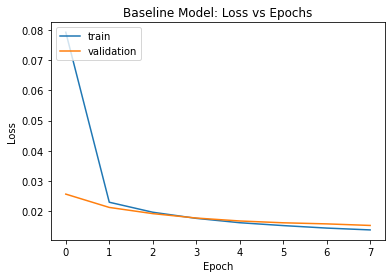

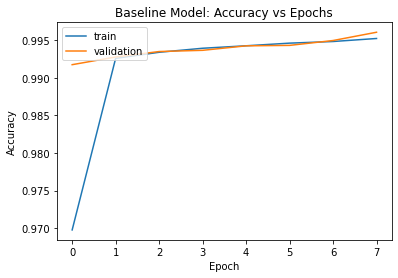

In [39]:
import matplotlib.pyplot as plt

plt.plot(baseline_model_history.history['loss'])
plt.plot(baseline_model_history.history['val_loss'])
plt.title('Baseline Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(baseline_model_history.history['accuracy'])
plt.plot(baseline_model_history.history['val_accuracy'])
plt.title('Baseline Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Learning Curve for no hidden layer model

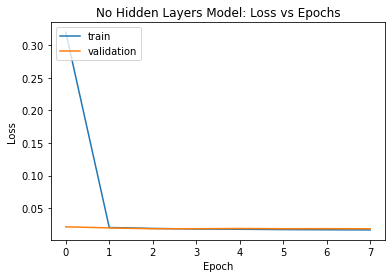

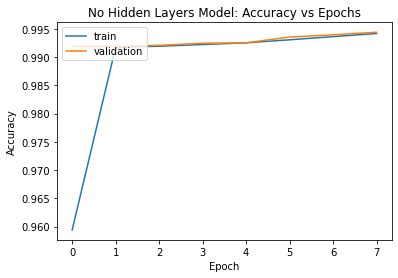

In [137]:
import matplotlib.pyplot as plt

plt.plot(no_hidden_layers_model_history.history['loss'])
plt.plot(no_hidden_layers_model_history.history['val_loss'])
plt.title('No Hidden Layers Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(no_hidden_layers_model_history.history['accuracy'])
plt.plot(no_hidden_layers_model_history.history['val_accuracy'])
plt.title('No Hidden Layers Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Learning Curve for Two Hidden Layers Model

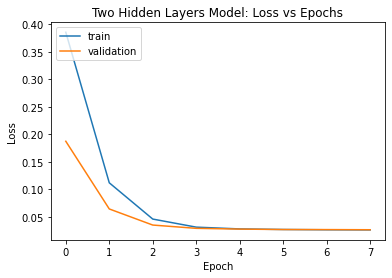

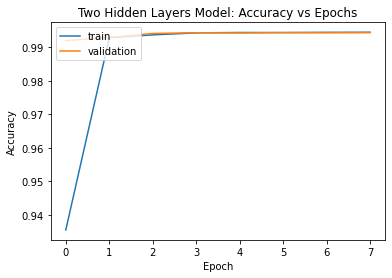

In [138]:
import matplotlib.pyplot as plt

plt.plot(two_hidden_layers_model_history.history['loss'])
plt.plot(two_hidden_layers_model_history.history['val_loss'])
plt.title('Two Hidden Layers Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(two_hidden_layers_model_history.history['accuracy'])
plt.plot(two_hidden_layers_model_history.history['val_accuracy'])
plt.title('Two Hidden Layers Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Step-2: Trying out different hyper-parameter combinations

#### 2.1 Changing the activation function and losses

In [40]:
relu_activation_fn_model = Sequential()
relu_activation_fn_model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
relu_activation_fn_model.add(Dense(1, activation='sigmoid')) 
relu_activation_fn_model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

softmax_activation_fn_model = Sequential()
softmax_activation_fn_model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='softmax'))
softmax_activation_fn_model.add(Dense(1, activation='sigmoid'))
softmax_activation_fn_model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

In [41]:
relu_activation_fn_model_history = relu_activation_fn_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 1s 678us/step - loss: 0.0953 - accuracy: 0.9664 - val_loss: 0.0263 - val_accuracy: 0.9919
Epoch 2/8
1544/1544 [==============================] - 1s 605us/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0201 - val_accuracy: 0.9936
Epoch 3/8
1544/1544 [==============================] - 1s 610us/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0160 - val_accuracy: 0.9945
Epoch 4/8
1544/1544 [==============================] - 1s 594us/step - loss: 0.0135 - accuracy: 0.9951 - val_loss: 0.0124 - val_accuracy: 0.9956
Epoch 5/8
1544/1544 [==============================] - 1s 604us/step - loss: 0.0101 - accuracy: 0.9965 - val_loss: 0.0094 - val_accuracy: 0.9972
Epoch 6/8
1544/1544 [==============================] - 1s 612us/step - loss: 0.0078 - accuracy: 0.9980 - val_loss: 0.0077 - val_accuracy: 0.9980
Epoch 7/8
1544/1544 [==============================] - 1s 586us/step - loss: 0.0066 - accuracy: 0.9984 - val_loss: 0.0070 - val_ac

In [42]:
softmax_activation_fn_model_history = softmax_activation_fn_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 1s 661us/step - loss: 0.0000e+00 - accuracy: 0.8005 - val_loss: 0.0000e+00 - val_accuracy: 0.8034
Epoch 2/8
1544/1544 [==============================] - 1s 606us/step - loss: 0.0000e+00 - accuracy: 0.8030 - val_loss: 0.0000e+00 - val_accuracy: 0.8034
Epoch 3/8
1544/1544 [==============================] - 1s 614us/step - loss: 0.0000e+00 - accuracy: 0.8030 - val_loss: 0.0000e+00 - val_accuracy: 0.8034
Epoch 4/8
1544/1544 [==============================] - 1s 578us/step - loss: 0.0000e+00 - accuracy: 0.8030 - val_loss: 0.0000e+00 - val_accuracy: 0.8034
Epoch 5/8
1544/1544 [==============================] - 1s 585us/step - loss: 0.0000e+00 - accuracy: 0.8030 - val_loss: 0.0000e+00 - val_accuracy: 0.8034
Epoch 6/8
1544/1544 [==============================] - 1s 596us/step - loss: 0.0000e+00 - accuracy: 0.8030 - val_loss: 0.0000e+00 - val_accuracy: 0.8034
Epoch 7/8
1544/1544 [==============================] - 1s 589us/step - loss: 0.000

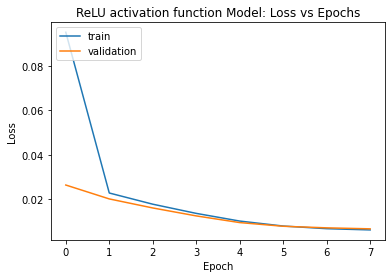

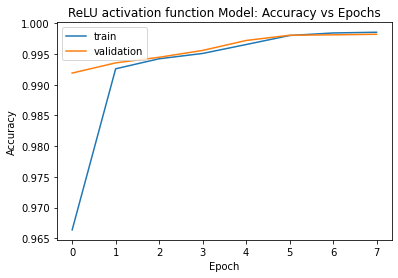

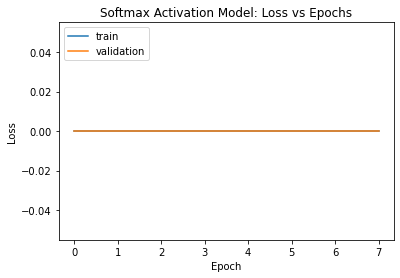

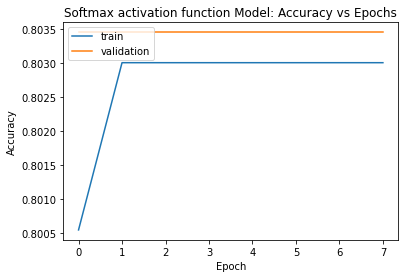

In [141]:
import matplotlib.pyplot as plt

plt.plot(relu_activation_fn_model_history.history['loss'])
plt.plot(relu_activation_fn_model_history.history['val_loss'])
plt.title('ReLU activation function Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(relu_activation_fn_model_history.history['accuracy'])
plt.plot(relu_activation_fn_model_history.history['val_accuracy'])
plt.title('ReLU activation function Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(softmax_activation_fn_model_history.history['loss'])
plt.plot(softmax_activation_fn_model_history.history['val_loss'])
plt.title('Softmax Activation Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(softmax_activation_fn_model_history.history['accuracy'])
plt.plot(softmax_activation_fn_model_history.history['val_accuracy'])
plt.title('Softmax activation function Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [43]:
all_models['Single Hidden Layer ReLU Activation'] = relu_activation_fn_model
all_models['Single Hidden Layer Softmax Activation'] = softmax_activation_fn_model

**Inference:**
    As seen from the above two model builds, 'relu' activation function has shown better performance where we achieved an accuracy of 99.82. Therefore, Current Best = Baseline + relu activation

#### 2.2 Changing optimizers

In [44]:
import tensorflow as tf

sgd_optimizer_model = Sequential()
sgd_optimizer_model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
sgd_optimizer_model.add(Dense(1, activation='sigmoid'))
sgd_optimizer_model.compile(loss='binary_crossentropy', optimizer = 'sgd', metrics=[ 'accuracy', tf.keras.metrics.Precision()])

adam_optimizer_model = Sequential()
adam_optimizer_model.add(Dense(4, input_dim = len(XTRAIN[0, :])))
adam_optimizer_model.add(Dense(1, activation='sigmoid'))
adam_optimizer_model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=[ 'accuracy'])

adagrad_optimizer_model = Sequential()
adagrad_optimizer_model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
adagrad_optimizer_model.add(Dense(1, activation='sigmoid'))
adagrad_optimizer_model.compile(loss='binary_crossentropy', optimizer = 'Adagrad', metrics=[ 'accuracy'])

In [45]:
all_models['Single Hidden Layer SGD optimizer'] = sgd_optimizer_model
all_models['Single Hidden Layer Adam optimizer'] = adam_optimizer_model
all_models['Single Hidden Layer Adagrad optimizer'] = adagrad_optimizer_model

In [46]:
sgd_optimizer_model_history = sgd_optimizer_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 2s 777us/step - loss: 0.1738 - accuracy: 0.9331 - precision_1: 0.9482 - val_loss: 0.0662 - val_accuracy: 0.9879 - val_precision_1: 0.9549
Epoch 2/8
1544/1544 [==============================] - 1s 693us/step - loss: 0.0561 - accuracy: 0.9872 - precision_1: 0.9506 - val_loss: 0.0497 - val_accuracy: 0.9868 - val_precision_1: 0.9493
Epoch 3/8
1544/1544 [==============================] - 1s 680us/step - loss: 0.0484 - accuracy: 0.9866 - precision_1: 0.9477 - val_loss: 0.0459 - val_accuracy: 0.9869 - val_precision_1: 0.9494
Epoch 4/8
1544/1544 [==============================] - 1s 683us/step - loss: 0.0455 - accuracy: 0.9866 - precision_1: 0.9479 - val_loss: 0.0435 - val_accuracy: 0.9869 - val_precision_1: 0.9493
Epoch 5/8
1544/1544 [==============================] - 1s 688us/step - loss: 0.0434 - accuracy: 0.9868 - precision_1: 0.9483 - val_loss: 0.0417 - val_accuracy: 0.9869 - val_precision_1: 0.9495
Epoch 6/8
1544/1544 [==============

In [47]:
adam_optimizer_model_history = adam_optimizer_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 1s 709us/step - loss: 0.1090 - accuracy: 0.9618 - val_loss: 0.0360 - val_accuracy: 0.9917
Epoch 2/8
1544/1544 [==============================] - 1s 640us/step - loss: 0.0308 - accuracy: 0.9917 - val_loss: 0.0265 - val_accuracy: 0.9920
Epoch 3/8
1544/1544 [==============================] - 1s 632us/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.0219 - val_accuracy: 0.9926
Epoch 4/8
1544/1544 [==============================] - 1s 638us/step - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.0193 - val_accuracy: 0.9937
Epoch 5/8
1544/1544 [==============================] - 1s 632us/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.0175 - val_accuracy: 0.9940
Epoch 6/8
1544/1544 [==============================] - 1s 632us/step - loss: 0.0162 - accuracy: 0.9944 - val_loss: 0.0163 - val_accuracy: 0.9941
Epoch 7/8
1544/1544 [==============================] - 1s 629us/step - loss: 0.0150 - accuracy: 0.9947 - val_loss: 0.0155 - val_ac

In [48]:
adagrad_optimizer_model_history = adagrad_optimizer_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 1s 671us/step - loss: 0.6596 - accuracy: 0.6670 - val_loss: 0.6207 - val_accuracy: 0.8082
Epoch 2/8
1544/1544 [==============================] - 1s 598us/step - loss: 0.5795 - accuracy: 0.9166 - val_loss: 0.5359 - val_accuracy: 0.9629
Epoch 3/8
1544/1544 [==============================] - 1s 605us/step - loss: 0.5142 - accuracy: 0.9651 - val_loss: 0.4942 - val_accuracy: 0.9753
Epoch 4/8
1544/1544 [==============================] - 1s 604us/step - loss: 0.4825 - accuracy: 0.9773 - val_loss: 0.4689 - val_accuracy: 0.9788
Epoch 5/8
1544/1544 [==============================] - 1s 595us/step - loss: 0.4612 - accuracy: 0.9797 - val_loss: 0.4510 - val_accuracy: 0.9814
Epoch 6/8
1544/1544 [==============================] - 1s 594us/step - loss: 0.4458 - accuracy: 0.9814 - val_loss: 0.4376 - val_accuracy: 0.9823
Epoch 7/8
1544/1544 [==============================] - 1s 609us/step - loss: 0.4338 - accuracy: 0.9826 - val_loss: 0.4267 - val_ac

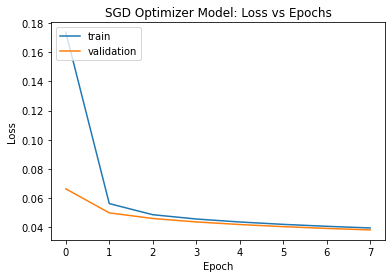

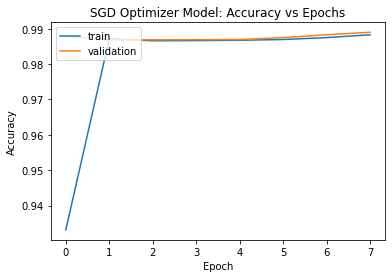

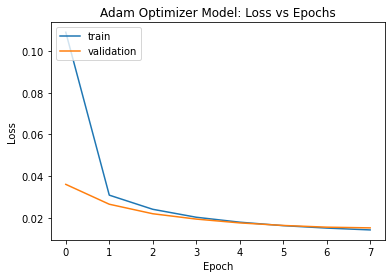

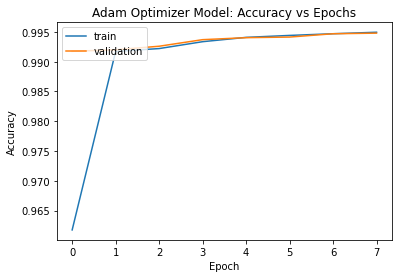

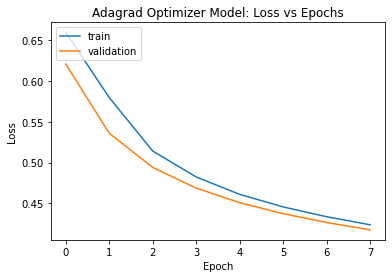

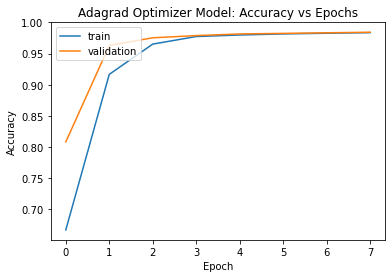

In [142]:
import matplotlib.pyplot as plt

plt.plot(sgd_optimizer_model_history.history['loss'])
plt.plot(sgd_optimizer_model_history.history['val_loss'])
plt.title('SGD Optimizer Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(sgd_optimizer_model_history.history['accuracy'])
plt.plot(sgd_optimizer_model_history.history['val_accuracy'])
plt.title('SGD Optimizer Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(adam_optimizer_model_history.history['loss'])
plt.plot(adam_optimizer_model_history.history['val_loss'])
plt.title('Adam Optimizer Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(adam_optimizer_model_history.history['accuracy'])
plt.plot(adam_optimizer_model_history.history['val_accuracy'])
plt.title('Adam Optimizer Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(adagrad_optimizer_model_history.history['loss'])
plt.plot(adagrad_optimizer_model_history.history['val_loss'])
plt.title('Adagrad Optimizer Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(adagrad_optimizer_model_history.history['accuracy'])
plt.plot(adagrad_optimizer_model_history.history['val_accuracy'])
plt.title('Adagrad Optimizer Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Inference:** As seen from above three model runs, 'rmsprop' optimizer that was used in the baseline model still performed better when compared to other optimizers

#### 2.3 Changing the batch size

In [49]:
single_hidden_layer_relu_model_batch_128 = Sequential()
single_hidden_layer_relu_model_batch_128.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_relu_model_batch_128.add(Dense(1, activation='sigmoid'))
single_hidden_layer_relu_model_batch_128.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])


single_hidden_layer_relu_model_batch_64 = Sequential()
single_hidden_layer_relu_model_batch_64.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_relu_model_batch_64.add(Dense(1, activation='sigmoid'))
single_hidden_layer_relu_model_batch_64.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])


single_hidden_layer_relu_model_batch_32 = Sequential()
single_hidden_layer_relu_model_batch_32.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_relu_model_batch_32.add(Dense(1, activation='sigmoid'))
single_hidden_layer_relu_model_batch_32.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

In [50]:
all_models['Single Hidden Layer Batch Size 128'] = single_hidden_layer_relu_model_batch_128
all_models['Single Hidden Layer Batch Size 64'] = single_hidden_layer_relu_model_batch_64
all_models['Single Hidden Layer Batch Size 32'] = single_hidden_layer_relu_model_batch_32

In [51]:
single_hidden_layer_relu_model_batch_128_history = single_hidden_layer_relu_model_batch_128.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=128, epochs =8, verbose = 1)

Epoch 1/8
3088/3088 [==============================] - 2s 669us/step - loss: 0.0484 - accuracy: 0.9872 - val_loss: 0.0231 - val_accuracy: 0.9920
Epoch 2/8
3088/3088 [==============================] - 2s 602us/step - loss: 0.0208 - accuracy: 0.9931 - val_loss: 0.0197 - val_accuracy: 0.9934
Epoch 3/8
3088/3088 [==============================] - 2s 606us/step - loss: 0.0179 - accuracy: 0.9938 - val_loss: 0.0177 - val_accuracy: 0.9937
Epoch 4/8
3088/3088 [==============================] - 2s 605us/step - loss: 0.0156 - accuracy: 0.9943 - val_loss: 0.0154 - val_accuracy: 0.9943
Epoch 5/8
3088/3088 [==============================] - 2s 601us/step - loss: 0.0129 - accuracy: 0.9948 - val_loss: 0.0130 - val_accuracy: 0.9961
Epoch 6/8
3088/3088 [==============================] - 2s 576us/step - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.0109 - val_accuracy: 0.9979
Epoch 7/8
3088/3088 [==============================] - 2s 580us/step - loss: 0.0088 - accuracy: 0.9983 - val_loss: 0.0092 - val_ac

In [52]:
single_hidden_layer_relu_model_batch_64_history = single_hidden_layer_relu_model_batch_64.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=64, epochs =8, verbose = 1)

Epoch 1/8
6176/6176 [==============================] - 4s 568us/step - loss: 0.0494 - accuracy: 0.9824 - val_loss: 0.0240 - val_accuracy: 0.9929
Epoch 2/8
6176/6176 [==============================] - 3s 544us/step - loss: 0.0220 - accuracy: 0.9940 - val_loss: 0.0203 - val_accuracy: 0.9941
Epoch 3/8
6176/6176 [==============================] - 3s 552us/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0168 - val_accuracy: 0.9940
Epoch 4/8
6176/6176 [==============================] - 3s 548us/step - loss: 0.0142 - accuracy: 0.9942 - val_loss: 0.0131 - val_accuracy: 0.9943
Epoch 5/8
6176/6176 [==============================] - 4s 580us/step - loss: 0.0111 - accuracy: 0.9953 - val_loss: 0.0111 - val_accuracy: 0.9963
Epoch 6/8
6176/6176 [==============================] - 3s 546us/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.0110 - val_accuracy: 0.9969
Epoch 7/8
6176/6176 [==============================] - 3s 538us/step - loss: 0.0094 - accuracy: 0.9976 - val_loss: 0.0106 - val_ac

In [53]:
single_hidden_layer_relu_model_batch_32_history = single_hidden_layer_relu_model_batch_32.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=32, epochs =8, verbose = 1)

Epoch 1/8
12351/12351 [==============================] - 7s 554us/step - loss: 0.0411 - accuracy: 0.9853 - val_loss: 0.0220 - val_accuracy: 0.9925
Epoch 2/8
12351/12351 [==============================] - 7s 542us/step - loss: 0.0194 - accuracy: 0.9928 - val_loss: 0.0180 - val_accuracy: 0.9933
Epoch 3/8
12351/12351 [==============================] - 7s 542us/step - loss: 0.0153 - accuracy: 0.9944 - val_loss: 0.0154 - val_accuracy: 0.9953
Epoch 4/8
12351/12351 [==============================] - 7s 547us/step - loss: 0.0131 - accuracy: 0.9972 - val_loss: 0.0133 - val_accuracy: 0.9976
Epoch 5/8
12351/12351 [==============================] - 7s 553us/step - loss: 0.0115 - accuracy: 0.9979 - val_loss: 0.0130 - val_accuracy: 0.9978
Epoch 6/8
12351/12351 [==============================] - 7s 542us/step - loss: 0.0109 - accuracy: 0.9981 - val_loss: 0.0124 - val_accuracy: 0.9980
Epoch 7/8
12351/12351 [==============================] - 7s 542us/step - loss: 0.0108 - accuracy: 0.9983 - val_loss: 0

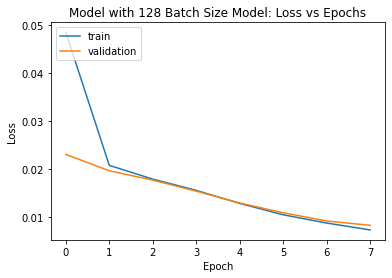

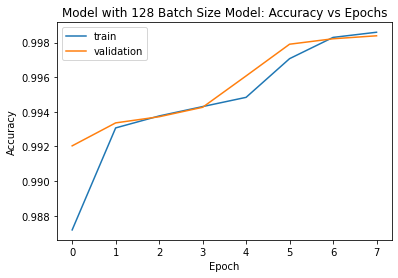

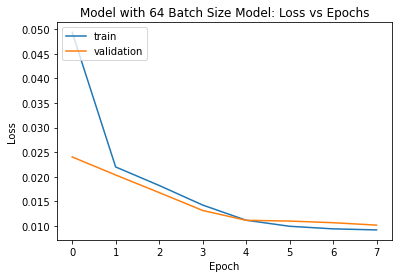

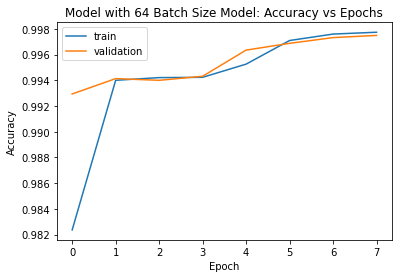

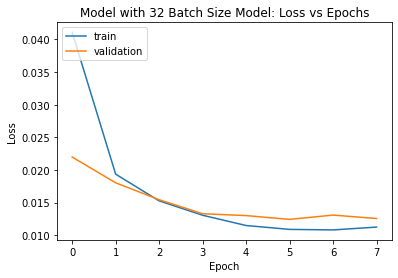

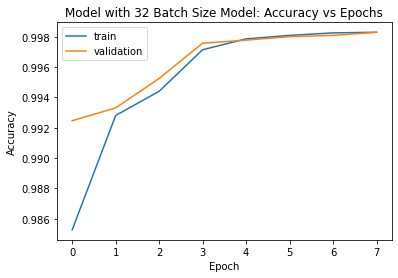

In [143]:
import matplotlib.pyplot as plt

plt.plot(single_hidden_layer_relu_model_batch_128_history.history['loss'])
plt.plot(single_hidden_layer_relu_model_batch_128_history.history['val_loss'])
plt.title('Model with 128 Batch Size Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_relu_model_batch_128_history.history['accuracy'])
plt.plot(single_hidden_layer_relu_model_batch_128_history.history['val_accuracy'])
plt.title('Model with 128 Batch Size Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_relu_model_batch_64_history.history['loss'])
plt.plot(single_hidden_layer_relu_model_batch_64_history.history['val_loss'])
plt.title('Model with 64 Batch Size Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_relu_model_batch_64_history.history['accuracy'])
plt.plot(single_hidden_layer_relu_model_batch_64_history.history['val_accuracy'])
plt.title('Model with 64 Batch Size Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



plt.plot(single_hidden_layer_relu_model_batch_32_history.history['loss'])
plt.plot(single_hidden_layer_relu_model_batch_32_history.history['val_loss'])
plt.title('Model with 32 Batch Size Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_relu_model_batch_32_history.history['accuracy'])
plt.plot(single_hidden_layer_relu_model_batch_32_history.history['val_accuracy'])
plt.title('Model with 32 Batch Size Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Inference:**
    As seen from the above model runs for different batch_sizes, the validation set accuracy is highest for batch_size=128 i.e 99.84

#### 2.4 Changing the number of neurons

In [71]:
single_hidden_layer_2_neurons_relu_model = Sequential()
single_hidden_layer_2_neurons_relu_model.add(Dense(2, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_2_neurons_relu_model.add(Dense(1, activation='sigmoid'))
single_hidden_layer_2_neurons_relu_model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])


single_hidden_layer_6_neurons_relu_model = Sequential()
single_hidden_layer_6_neurons_relu_model.add(Dense(6, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_6_neurons_relu_model.add(Dense(1, activation='sigmoid'))
single_hidden_layer_6_neurons_relu_model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])


In [72]:
all_models['Single Hidden Layer 2 Neurons'] = single_hidden_layer_2_neurons_relu_model
all_models['Single Hidden Layer 6 Neurons'] = single_hidden_layer_6_neurons_relu_model

In [73]:
single_hidden_layer_2_neurons_relu_model_history = single_hidden_layer_2_neurons_relu_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 1s 703us/step - loss: 0.1635 - accuracy: 0.9440 - val_loss: 0.0638 - val_accuracy: 0.9927
Epoch 2/8
1544/1544 [==============================] - 1s 629us/step - loss: 0.0444 - accuracy: 0.9927 - val_loss: 0.0327 - val_accuracy: 0.9931
Epoch 3/8
1544/1544 [==============================] - 1s 618us/step - loss: 0.0318 - accuracy: 0.9927 - val_loss: 0.0301 - val_accuracy: 0.9931
Epoch 4/8
1544/1544 [==============================] - 1s 628us/step - loss: 0.0311 - accuracy: 0.9927 - val_loss: 0.0300 - val_accuracy: 0.9931
Epoch 5/8
1544/1544 [==============================] - 1s 630us/step - loss: 0.0310 - accuracy: 0.9927 - val_loss: 0.0300 - val_accuracy: 0.9932
Epoch 6/8
1544/1544 [==============================] - 1s 625us/step - loss: 0.0310 - accuracy: 0.9928 - val_loss: 0.0299 - val_accuracy: 0.9931
Epoch 7/8
1544/1544 [==============================] - 1s 649us/step - loss: 0.0309 - accuracy: 0.9928 - val_loss: 0.0299 - val_ac

In [74]:
single_hidden_layer_6_neurons_relu_model_history = single_hidden_layer_6_neurons_relu_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 1s 703us/step - loss: 0.0577 - accuracy: 0.9842 - val_loss: 0.0243 - val_accuracy: 0.9931
Epoch 2/8
1544/1544 [==============================] - 1s 639us/step - loss: 0.0217 - accuracy: 0.9932 - val_loss: 0.0200 - val_accuracy: 0.9939
Epoch 3/8
1544/1544 [==============================] - 1s 628us/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0167 - val_accuracy: 0.9944
Epoch 4/8
1544/1544 [==============================] - 1s 628us/step - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.0148 - val_accuracy: 0.9946
Epoch 5/8
1544/1544 [==============================] - 1s 628us/step - loss: 0.0129 - accuracy: 0.9952 - val_loss: 0.0130 - val_accuracy: 0.9952
Epoch 6/8
1544/1544 [==============================] - 1s 624us/step - loss: 0.0112 - accuracy: 0.9956 - val_loss: 0.0114 - val_accuracy: 0.9954
Epoch 7/8
1544/1544 [==============================] - 1s 629us/step - loss: 0.0096 - accuracy: 0.9963 - val_loss: 0.0099 - val_ac

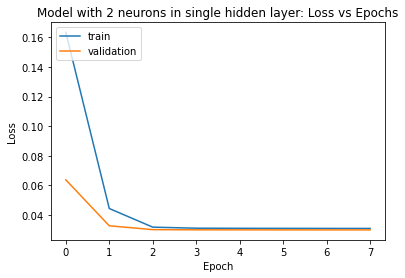

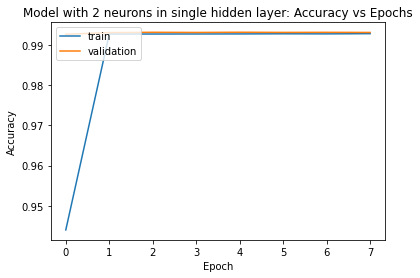

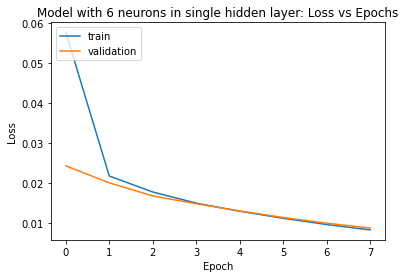

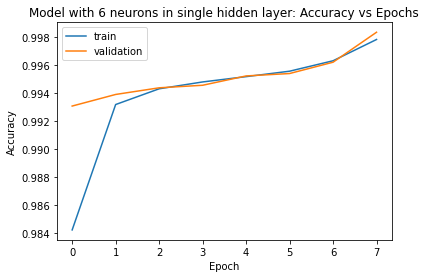

In [145]:
import matplotlib.pyplot as plt

plt.plot(single_hidden_layer_2_neurons_relu_model_history.history['loss'])
plt.plot(single_hidden_layer_2_neurons_relu_model_history.history['val_loss'])
plt.title('Model with 2 neurons in single hidden layer: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_2_neurons_relu_model_history.history['accuracy'])
plt.plot(single_hidden_layer_2_neurons_relu_model_history.history['val_accuracy'])
plt.title('Model with 2 neurons in single hidden layer: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



plt.plot(single_hidden_layer_6_neurons_relu_model_history.history['loss'])
plt.plot(single_hidden_layer_6_neurons_relu_model_history.history['val_loss'])
plt.title('Model with 6 neurons in single hidden layer: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_6_neurons_relu_model_history.history['accuracy'])
plt.plot(single_hidden_layer_6_neurons_relu_model_history.history['val_accuracy'])
plt.title('Model with 6 neurons in single hidden layer: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Inference:**
    As seen from the runs of above two models, the number of neurons 4 (which was originally used in baseline model) still performs better (with 99.84 accuracy) than the other 2 neurons and 6 neurons

#### 2.5 Changing number of epochs

In [84]:
single_hidden_layer_relu_model_epoch_16 = Sequential()
single_hidden_layer_relu_model_epoch_16.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_relu_model_epoch_16.add(Dense(1, activation='sigmoid'))
single_hidden_layer_relu_model_epoch_16.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])


single_hidden_layer_relu_model_epoch_32 = Sequential()
single_hidden_layer_relu_model_epoch_32.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_relu_model_epoch_32.add(Dense(1, activation='sigmoid'))
single_hidden_layer_relu_model_epoch_32.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

single_hidden_layer_relu_model_epoch_64_early_stopping = Sequential()
single_hidden_layer_relu_model_epoch_64_early_stopping.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_relu_model_epoch_64_early_stopping.add(Dense(1, activation='sigmoid'))
single_hidden_layer_relu_model_epoch_64_early_stopping.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])


single_hidden_layer_relu_model_epoch_64_no_early_stopping = Sequential()
single_hidden_layer_relu_model_epoch_64_no_early_stopping.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_relu_model_epoch_64_no_early_stopping.add(Dense(1, activation='sigmoid'))
single_hidden_layer_relu_model_epoch_64_no_early_stopping.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

In [85]:
all_models['Single Hidden Layer Epoch 16'] = single_hidden_layer_relu_model_epoch_16
all_models['Single Hidden Layer Epoch 32'] = single_hidden_layer_relu_model_epoch_32
all_models['Single Hidden Layer Epoch 64 with Early Stopping'] = single_hidden_layer_relu_model_epoch_64_early_stopping
all_models['Single Hidden Layer Epoch 64 without Early Stopping'] = single_hidden_layer_relu_model_epoch_64_no_early_stopping

In [86]:
single_hidden_layer_relu_model_epoch_16_history = single_hidden_layer_relu_model_epoch_16.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =16, verbose = 1)

Epoch 1/16
1544/1544 [==============================] - 1s 701us/step - loss: 0.0882 - accuracy: 0.9747 - val_loss: 0.0260 - val_accuracy: 0.9919
Epoch 2/16
1544/1544 [==============================] - 1s 613us/step - loss: 0.0233 - accuracy: 0.9923 - val_loss: 0.0214 - val_accuracy: 0.9932
Epoch 3/16
1544/1544 [==============================] - 1s 619us/step - loss: 0.0199 - accuracy: 0.9935 - val_loss: 0.0191 - val_accuracy: 0.9936
Epoch 4/16
1544/1544 [==============================] - 1s 619us/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.0175 - val_accuracy: 0.9937
Epoch 5/16
1544/1544 [==============================] - 1s 639us/step - loss: 0.0159 - accuracy: 0.9943 - val_loss: 0.0158 - val_accuracy: 0.9941
Epoch 6/16
1544/1544 [==============================] - 1s 623us/step - loss: 0.0141 - accuracy: 0.9946 - val_loss: 0.0140 - val_accuracy: 0.9948
Epoch 7/16
1544/1544 [==============================] - 1s 625us/step - loss: 0.0121 - accuracy: 0.9951 - val_loss: 0.0122 -

In [87]:
single_hidden_layer_relu_model_epoch_32_history = single_hidden_layer_relu_model_epoch_32.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =32, verbose = 1)

Epoch 1/32
1544/1544 [==============================] - 1s 715us/step - loss: 0.0774 - accuracy: 0.9825 - val_loss: 0.0254 - val_accuracy: 0.9918
Epoch 2/32
1544/1544 [==============================] - 1s 640us/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0211 - val_accuracy: 0.9928
Epoch 3/32
1544/1544 [==============================] - 1s 633us/step - loss: 0.0197 - accuracy: 0.9933 - val_loss: 0.0189 - val_accuracy: 0.9936
Epoch 4/32
1544/1544 [==============================] - 1s 631us/step - loss: 0.0171 - accuracy: 0.9939 - val_loss: 0.0167 - val_accuracy: 0.9940
Epoch 5/32
1544/1544 [==============================] - 1s 633us/step - loss: 0.0146 - accuracy: 0.9944 - val_loss: 0.0141 - val_accuracy: 0.9947
Epoch 6/32
1544/1544 [==============================] - 1s 626us/step - loss: 0.0123 - accuracy: 0.9949 - val_loss: 0.0119 - val_accuracy: 0.9950
Epoch 7/32
1544/1544 [==============================] - 1s 639us/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.0100 -

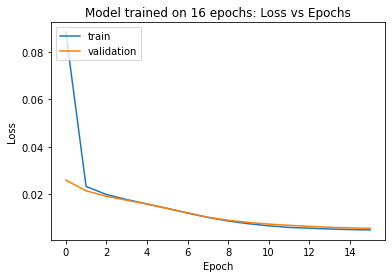

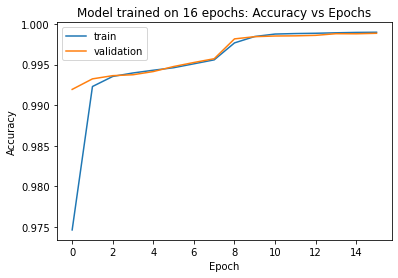

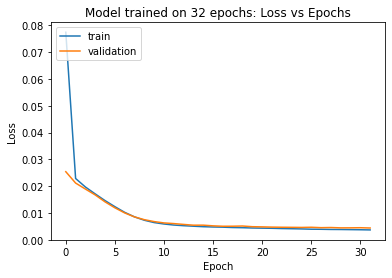

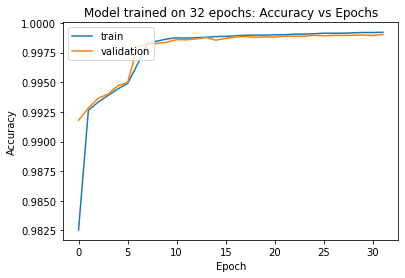

In [146]:
import matplotlib.pyplot as plt

plt.plot(single_hidden_layer_relu_model_epoch_16_history.history['loss'])
plt.plot(single_hidden_layer_relu_model_epoch_16_history.history['val_loss'])
plt.title('Model trained on 16 epochs: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_relu_model_epoch_16_history.history['accuracy'])
plt.plot(single_hidden_layer_relu_model_epoch_16_history.history['val_accuracy'])
plt.title('Model trained on 16 epochs: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(single_hidden_layer_relu_model_epoch_32_history.history['loss'])
plt.plot(single_hidden_layer_relu_model_epoch_32_history.history['val_loss'])
plt.title('Model trained on 32 epochs: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_relu_model_epoch_32_history.history['accuracy'])
plt.plot(single_hidden_layer_relu_model_epoch_32_history.history['val_accuracy'])
plt.title('Model trained on 32 epochs: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 3. Early Stopping

In [88]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# File name must be in quotes
callback_a = ModelCheckpoint(filepath = "../saved_models/early_stopped_model.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
# The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=4, verbose=1)

In [89]:
single_hidden_layer_relu_model_epoch_64_history = single_hidden_layer_relu_model_epoch_64_early_stopping.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =64, verbose = 1,
                                            callbacks = [callback_a, callback_b])

Epoch 1/64
1544/1544 [==============================] - 1s 715us/step - loss: 0.0747 - accuracy: 0.9730 - val_loss: 0.0264 - val_accuracy: 0.9919

Epoch 00001: val_loss improved from inf to 0.02637, saving model to ../saved_models\early_stopped_model.hdf5
Epoch 2/64
1544/1544 [==============================] - 1s 648us/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0215 - val_accuracy: 0.9933

Epoch 00002: val_loss improved from 0.02637 to 0.02145, saving model to ../saved_models\early_stopped_model.hdf5
Epoch 3/64
1544/1544 [==============================] - 1s 694us/step - loss: 0.0200 - accuracy: 0.9939 - val_loss: 0.0193 - val_accuracy: 0.9938

Epoch 00003: val_loss improved from 0.02145 to 0.01930, saving model to ../saved_models\early_stopped_model.hdf5
Epoch 4/64
1544/1544 [==============================] - 1s 732us/step - loss: 0.0173 - accuracy: 0.9943 - val_loss: 0.0166 - val_accuracy: 0.9943

Epoch 00004: val_loss improved from 0.01930 to 0.01658, saving model to ../sa

In [90]:
single_hidden_layer_relu_model_epoch_64_history_without_early_stopping = single_hidden_layer_relu_model_epoch_64_no_early_stopping.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =64, verbose = 1)

Epoch 1/64
1544/1544 [==============================] - 1s 713us/step - loss: 0.0607 - accuracy: 0.9777 - val_loss: 0.0250 - val_accuracy: 0.9923
Epoch 2/64
1544/1544 [==============================] - 1s 648us/step - loss: 0.0216 - accuracy: 0.9935 - val_loss: 0.0185 - val_accuracy: 0.9942
Epoch 3/64
1544/1544 [==============================] - 1s 643us/step - loss: 0.0157 - accuracy: 0.9943 - val_loss: 0.0133 - val_accuracy: 0.9942
Epoch 4/64
1544/1544 [==============================] - 1s 625us/step - loss: 0.0113 - accuracy: 0.9943 - val_loss: 0.0100 - val_accuracy: 0.9942
Epoch 5/64
1544/1544 [==============================] - 1s 626us/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0082 - val_accuracy: 0.9983
Epoch 6/64
1544/1544 [==============================] - 1s 632us/step - loss: 0.0071 - accuracy: 0.9983 - val_loss: 0.0068 - val_accuracy: 0.9985
Epoch 7/64
1544/1544 [==============================] - 1s 637us/step - loss: 0.0061 - accuracy: 0.9987 - val_loss: 0.0060 -

Epoch 57/64
1544/1544 [==============================] - 1s 660us/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0046 - val_accuracy: 0.9991
Epoch 58/64
1544/1544 [==============================] - 1s 664us/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0046 - val_accuracy: 0.9991
Epoch 59/64
1544/1544 [==============================] - 1s 670us/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0047 - val_accuracy: 0.9991
Epoch 60/64
1544/1544 [==============================] - 1s 670us/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0047 - val_accuracy: 0.9991
Epoch 61/64
1544/1544 [==============================] - 1s 683us/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0047 - val_accuracy: 0.9991
Epoch 62/64
1544/1544 [==============================] - 1s 643us/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0046 - val_accuracy: 0.9991
Epoch 63/64
1544/1544 [==============================] - 1s 636us/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0

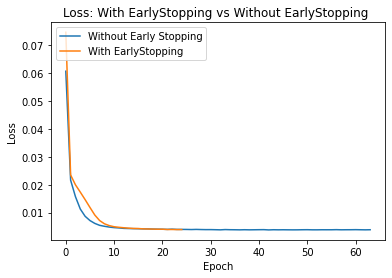

In [91]:
import matplotlib.pyplot as plt


plt.plot(single_hidden_layer_relu_model_epoch_64_history_without_early_stopping.history['loss'])

plt.plot(single_hidden_layer_relu_model_epoch_64_history.history['loss'])

plt.title('Loss: With EarlyStopping vs Without EarlyStopping ')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Without Early Stopping', 'With EarlyStopping'], loc='upper left')
plt.show()

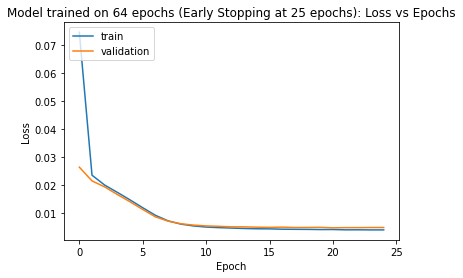

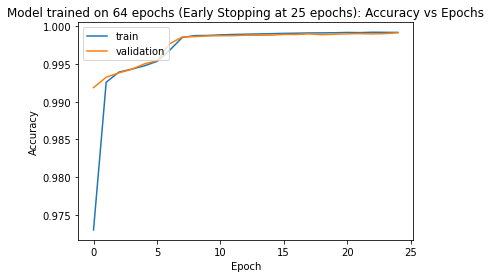

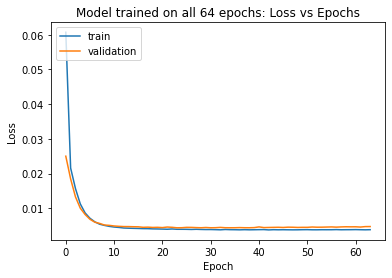

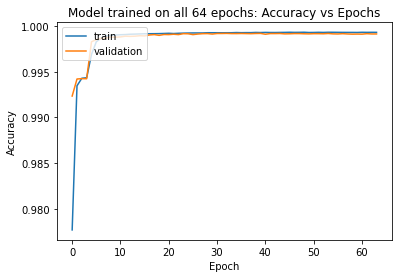

In [147]:
import matplotlib.pyplot as plt

plt.plot(single_hidden_layer_relu_model_epoch_64_history.history['loss'])
plt.plot(single_hidden_layer_relu_model_epoch_64_history.history['val_loss'])
plt.title('Model trained on 64 epochs (Early Stopping at 25 epochs): Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_relu_model_epoch_64_history.history['accuracy'])
plt.plot(single_hidden_layer_relu_model_epoch_64_history.history['val_accuracy'])
plt.title('Model trained on 64 epochs (Early Stopping at 25 epochs): Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(single_hidden_layer_relu_model_epoch_64_history_without_early_stopping.history['loss'])
plt.plot(single_hidden_layer_relu_model_epoch_64_history_without_early_stopping.history['val_loss'])
plt.title('Model trained on all 64 epochs: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_relu_model_epoch_64_history_without_early_stopping.history['accuracy'])
plt.plot(single_hidden_layer_relu_model_epoch_64_history_without_early_stopping.history['val_accuracy'])
plt.title('Model trained on all 64 epochs: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Inference** Early Stopping at Epoch 25 achieved highest accuracy of 99.91

### **Final Inference:**
    
    Final Best Model Hyperparameters:
        - batch_size = 256
        - No of hidden layers 1 with 4 neurons
        - Optimizer = rmsprop
        - Loss - Binary Cross Entropy
        - Activation: ReLU
        - Number of epochs = 25
    

### 4. Model Evaluation

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [101]:
def plot_roc_curve(fpr_arr, tpr_arr, auc_val, modelname):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_arr, tpr_arr, label=f'{modelname} (area = {round(auc_val,4)})')

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.show()

Obtaining results and metrics for the model = No Hidden Layers


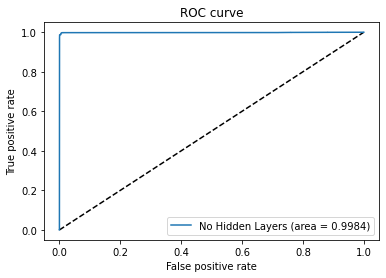



Obtaining results and metrics for the model = Single Hidden Layer


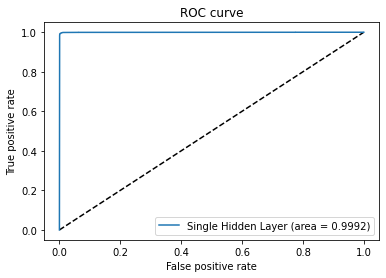



Obtaining results and metrics for the model = Two Hidden Layers


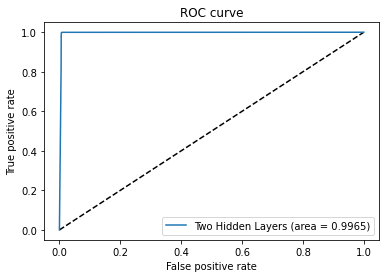



Obtaining results and metrics for the model = Single Hidden Layer ReLU Activation


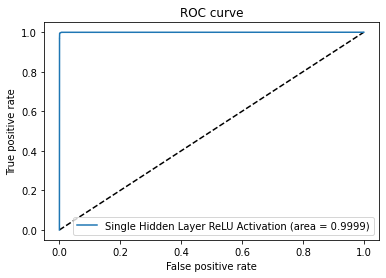



Obtaining results and metrics for the model = Single Hidden Layer Softmax Activation


C:\Users\mputchala\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


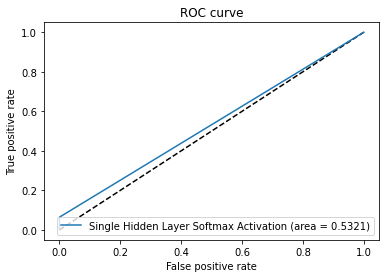



Obtaining results and metrics for the model = Single Hidden Layer SGD optimizer


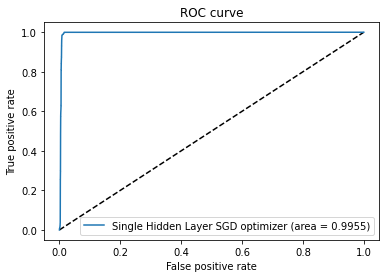



Obtaining results and metrics for the model = Single Hidden Layer Adam optimizer


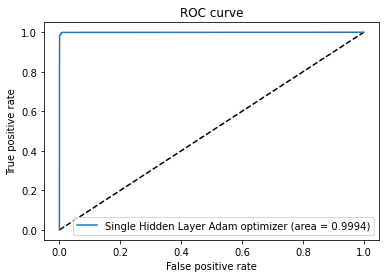



Obtaining results and metrics for the model = Single Hidden Layer Adagrad optimizer


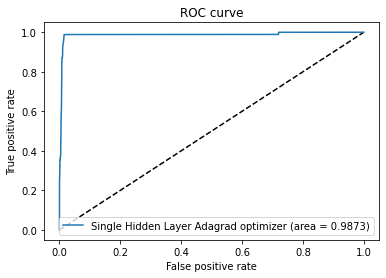



Obtaining results and metrics for the model = Single Hidden Layer Batch Size 128


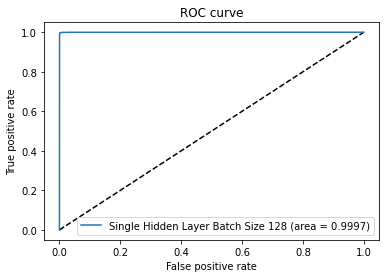



Obtaining results and metrics for the model = Single Hidden Layer Batch Size 64


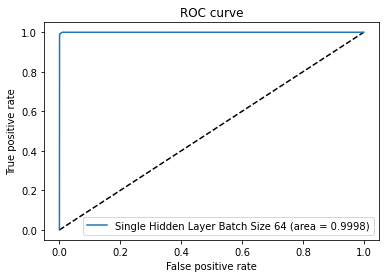



Obtaining results and metrics for the model = Single Hidden Layer Batch Size 32


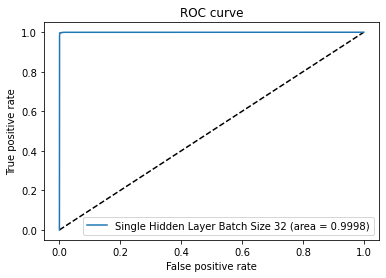



Obtaining results and metrics for the model = Single Hidden Layer 2 Neurons


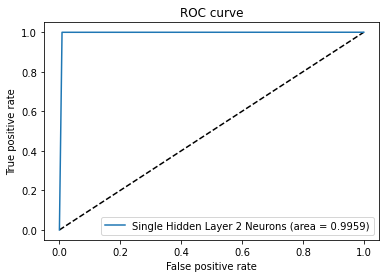



Obtaining results and metrics for the model = Single Hidden Layer 6 Neurons


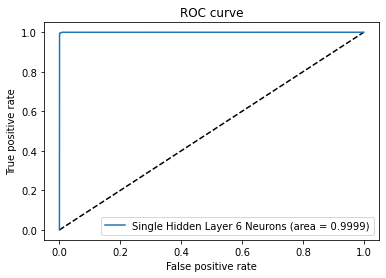



Obtaining results and metrics for the model = Single Hidden Layer Epoch 16


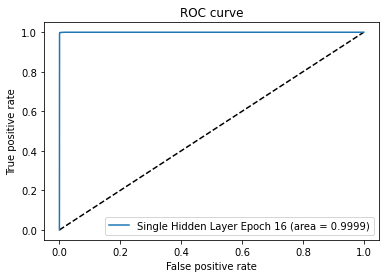



Obtaining results and metrics for the model = Single Hidden Layer Epoch 32


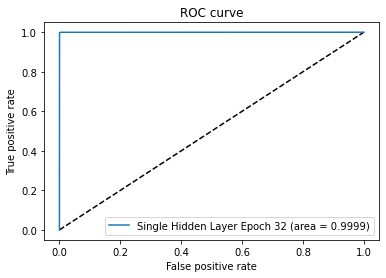



Obtaining results and metrics for the model = Single Hidden Layer Epoch 64 with Early Stopping


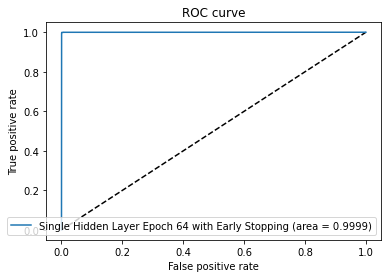



Obtaining results and metrics for the model = Single Hidden Layer Epoch 64 without Early Stopping


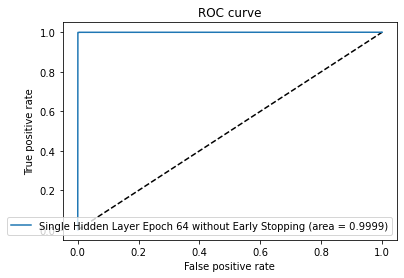

In [102]:

import numpy as np
y_true = YVALID.tolist()

results_df = pd.DataFrame()
idx = 0
for model_name, built_model in all_models.items():
    print(f"Obtaining results and metrics for the model = {model_name}")
    results_df.loc[idx, 'Model'] = model_name
    
    y_pred = built_model.predict(XVALID).tolist()
    y_pred_bool = [1 if each[0] >=0.5 else 0 for each in y_pred]
    #print(min(y_pred), max(y_pred))
    acc, prec, rec, f1 = accuracy_score(y_pred_bool, y_true), precision_score(y_pred_bool, y_true), recall_score(y_pred_bool, y_true), f1_score(y_pred_bool, y_true)
    
    results_df.loc[idx, 'Number of Parameters'] = built_model.count_params()
    results_df.loc[idx, 'Accuracy'] = round(acc,4)
    results_df.loc[idx, 'Precision'] = round(prec,4)
    results_df.loc[idx, 'Recall'] = round(rec,4)
    results_df.loc[idx, 'F1-Score'] = round(f1, 4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc_model = auc(fpr, tpr)
    results_df.loc[idx, 'auc_score'] = round(auc_model, 4)
    
    plot_roc_curve(fpr, tpr, auc_model, model_name)
    
    #break
    print("\n")
    idx +=1
    #print(each_model.evaluate(XVALID, YVALID))
    

In [103]:
results_df

,Model,Number of Parameters,Accuracy,Precision,Recall,F1-Score,auc_score
0,No Hidden Layers,120.0,0.9944,0.9932,0.9787,0.9859,0.9984
1,Single Hidden Layer,485.0,0.9961,0.9940,0.9863,0.9901,0.9992
2,Two Hidden Layers,493.0,0.9943,0.9972,0.9746,0.9858,0.9965
3,Single Hidden Layer ReLU Activation,485.0,0.9982,0.9942,0.9966,0.9954,0.9999
4,Single Hidden Layer Softmax Activation,485.0,0.8034,0.0000,0.0000,0.0000,0.5321
5,Single Hidden Layer SGD optimizer,485.0,0.9890,0.9886,0.9569,0.9725,0.9955
6,Single Hidden Layer Adam optimizer,485.0,0.9948,0.9959,0.9780,0.9869,0.9994
7,Single Hidden Layer Adagrad optimizer,485.0,0.9842,0.9804,0.9414,0.9605,0.9873
8,Single Hidden Layer Batch Size 128,485.0,0.9984,0.9955,0.9963,0.9959,0.9997
9,Single Hidden Layer Batch Size 64,485.0,0.9975,0.9910,0.9962,0.9936,0.9998


In [149]:
results_df.to_csv("../outputs/results_df.csv", index=False)

### Manual Self Made Custom predict function and its comparision to Keras predict

In [113]:
def build_best_model():
    best_model_selected = Sequential()
    best_model_selected.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
    best_model_selected.add(Dense(1, activation='sigmoid'))
    best_model_selected.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])
    best_model_selected_history = best_model_selected.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =25, verbose = 1)
    return best_model_selected, best_model_selected_history

In [114]:
best_model_selected, best_model_selected_history = build_best_model()

Epoch 1/25
1544/1544 [==============================] - 1s 697us/step - loss: 0.3530 - accuracy: 0.9768 - val_loss: 0.1777 - val_accuracy: 0.9921
Epoch 2/25
1544/1544 [==============================] - 1s 619us/step - loss: 0.1032 - accuracy: 0.9923 - val_loss: 0.0561 - val_accuracy: 0.9926
Epoch 3/25
1544/1544 [==============================] - 1s 616us/step - loss: 0.0365 - accuracy: 0.9933 - val_loss: 0.0248 - val_accuracy: 0.9942
Epoch 4/25
1544/1544 [==============================] - 1s 629us/step - loss: 0.0190 - accuracy: 0.9949 - val_loss: 0.0155 - val_accuracy: 0.9956
Epoch 5/25
1544/1544 [==============================] - 1s 607us/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0109 - val_accuracy: 0.9977
Epoch 6/25
1544/1544 [==============================] - 1s 620us/step - loss: 0.0089 - accuracy: 0.9985 - val_loss: 0.0083 - val_accuracy: 0.9985
Epoch 7/25
1544/1544 [==============================] - 1s 604us/step - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.0068 -

In [115]:
best_model_selected.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 4)                 480       
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 5         
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [117]:
len(best_model_selected.get_weights())

4

#### Manual Compute prediction

In [127]:
def manual_custom_predict(best_model_selected, XVALID):

    # Parameters layer 1
    W1 = best_model_selected.get_weights()[0]
    b1 = best_model_selected.get_weights()[1]

    # Parameters layer 2
    W2 = best_model_selected.get_weights()[2]
    b2 = best_model_selected.get_weights()[3]

    # Input
    #X1 = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
    # Use the following X1 for single input instead of all at once
    #X1 = np.array([[0,0]])

    # First layer calculation
    L1 = np.dot(XVALID,W1)+b1
    # Relu activation function
    X2 = np.maximum(L1,0)
    # Second layer calculation
    L2 = np.dot(X2,W2)+b2
    # Sigmoid
    output = 1/(1+np.exp(-L2))
    return output

output = manual_custom_predict(best_model_selected, XVALID)


#### Compare predictions

In [128]:
output[:20]

array([[5.74528108e-05],
       [5.74528108e-05],
       [1.00000000e+00],
       [5.74528108e-05],
       [5.74528108e-05],
       [1.00000000e+00],
       [5.74528108e-05],
       [5.74528108e-05],
       [5.74528108e-05],
       [5.74528108e-05],
       [5.74528108e-05],
       [5.74528108e-05],
       [9.99999988e-01],
       [5.74528108e-05],
       [5.74528108e-05],
       [5.74528108e-05],
       [5.74528108e-05],
       [5.74528108e-05],
       [9.99999999e-01],
       [5.74528108e-05]])

In [130]:
keras_model_predictions = best_model_selected.predict(XVALID)
keras_model_predictions[:20]

array([[5.7456113e-05],
       [5.7456113e-05],
       [1.0000000e+00],
       [5.7456113e-05],
       [5.7456113e-05],
       [1.0000000e+00],
       [5.7456113e-05],
       [5.7456113e-05],
       [5.7456113e-05],
       [5.7456113e-05],
       [5.7456113e-05],
       [5.7456113e-05],
       [1.0000000e+00],
       [5.7456113e-05],
       [5.7456113e-05],
       [5.7456113e-05],
       [5.7456113e-05],
       [5.7456113e-05],
       [1.0000000e+00],
       [5.7456113e-05]], dtype=float32)

#### Compare metrics

In [132]:
y_pred_output = [1 if each[0] >=0.5 else 0 for each in output]
acc = accuracy_score(y_pred_output, y_true)
prec = precision_score(y_pred_output, y_true)
rec = recall_score(y_pred_output, y_true)
f1 = f1_score(y_pred_output, y_true)

acc, prec, rec, f1

(0.9990688636087608,
 0.9973223480947477,
 0.9979389942291839,
 0.9976305758730812)

In [134]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred_output, y_true)

array([[79344,    52],
       [   40, 19368]], dtype=int64)

In [133]:
y_pred_model = [1 if each[0] >=0.5 else 0 for each in keras_model_predictions]
acc = accuracy_score(y_pred_model, y_true)
prec = precision_score(y_pred_model, y_true)
rec = recall_score(y_pred_model, y_true)
f1 = f1_score(y_pred_model, y_true)

acc, prec, rec, f1


(0.9990688636087608,
 0.9973223480947477,
 0.9979389942291839,
 0.9976305758730812)

In [135]:
confusion_matrix(y_pred_model, y_true)

array([[79344,    52],
       [   40, 19368]], dtype=int64)

**Conclusion:** As seen from above two metrics, the predictions made from manually implemented custom

**Note**: The above hyperparameter search can also be performed using grid-search techniques that are available in machine learning librararies like sklearn and tensorflow